# Object Detection - Faces and Pedestrians

Object detection is a fundamental task in Computer Vision. In this workbook I experiment with local image features and classifiers for object detection from still images and videos

In [1]:
import cv2 as cv
import os

## 1. Face Detection
### 1.1. Face detection from still images

In [18]:
import glob

face_image_paths = glob.glob("./resources/FaceImages/*")
padestrian_image_paths = glob.glob("./resources/PedestrianImages/*")

In [20]:
def detect_face(image, cascade_detector, scaleFactor, minNeighbors, minSize, flags):
    #convert input image to grayscale
    
    sf = scaleFactor
    mn = minNeighbors
    ms = minSize
    f = flags
    
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    faces = cascade_detector.detectMultiScale(image_gray,
                                              scaleFactor = sf, #the ratio between two consecutive scales
                                              minNeighbors = mn, #minimum number of overlapping windows to be considered
                                              minSize = ms, #minimum size of detection window (in pixels)
                                              flags = f) #scale the image rather than detection window

    return faces

In [21]:
def detect_face_no_flag(image, cascade_detector, scaleFactor, minNeighbors, minSize):
    #convert input image to grayscale
    image_gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    faces = cascade_detector.detectMultiScale(image_gray,
                                              scaleFactor = scaleFactor, #the ratio between two consecutive scales
                                              minNeighbors = minNeighbors, #minimum number of overlapping windows to be considered
                                              minSize = minSize) #minimum size of detection window (in pixels)                                       
    return faces

The methods used here were adapted from the paper `P. Viola and M. Jones. Rapid object detection using a boosted cascade of simple features. CVPR, 2001`

I use a pre-trained cascade filter to detect faces in various images and experiment with the different paramters available int he cascade_detector_detectMultiScale() method.

In [22]:
import time

image = cv.imread('./resources/FaceImages/abba.png')
cascade_detector = cv.CascadeClassifier('./resources/haarcascade_frontalface_default.xml')

start_time = time.time()
faces = detect_face(image,
                    cascade_detector,
                    scaleFactor = 1.1,
                    minNeighbors = 5,
                    minSize = (30, 30),
                    flags = cv.CASCADE_SCALE_IMAGE)

print('Face detection is performed in %s seconds ---' % (time.time() - start_time))

Face detection is performed in 0.05044364929199219 seconds ---


In [23]:
if (faces is not None):
    print('Found ', len(faces), ' faces')
else:
    print('There is no face found!')

Found  4  faces


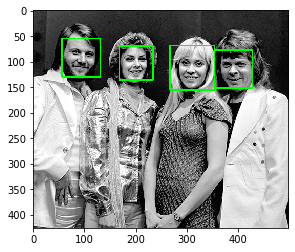

In [24]:
from matplotlib import pyplot as plt
for (x, y, w, h) in faces: #(x, y) are the coordinate of the topleft corner,
    # w, h are the width and height of the bounding box
    cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)

plt.imshow(image[:,:,::-1]) # RGB-> BGR

### Test Scale factor impact

In [25]:
scaleFactors = [1.1, 1.2, 1.3, 1.4, 1.5]


for image_path in face_image_paths:
    image = cv.imread(image_path)
    print(f"image: {image_path}")
    _, img_name = os.path.split(image_path)

    for scale in scaleFactors:
        start_time = time.time()
        image2 = image.copy()
        faces = detect_face(image,
                        cascade_detector,
                        scaleFactor = scale,
                        minNeighbors = 5,
                        minSize = (30, 30),
                        flags = cv.CASCADE_SCALE_IMAGE)
        for (x, y, w, h) in faces: #(x, y) are the coordinate of the topleft corner,
            # w, h are the width and height of the bounding box
            cv.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)
            fname = f'scale_{scale}_{img_name}'
            cv.imwrite(fname, image2)

        if (faces is not None):
            print(f'\tscale factor: {scale} - Face detection performed in {(time.time() - start_time):.3f} seconds - {len(faces)} found')
        else:
            print(f'\tscale factor: {scale} - Face detection performed in {(time.time() - start_time):.3f} seconds - no faces found!')

image: ./resources/FaceImages\abba.png
	scale factor: 1.1 - Face detection performed in 0.102 seconds - 4 found
	scale factor: 1.2 - Face detection performed in 0.071 seconds - 4 found
	scale factor: 1.3 - Face detection performed in 0.073 seconds - 4 found
	scale factor: 1.4 - Face detection performed in 0.073 seconds - 5 found
	scale factor: 1.5 - Face detection performed in 0.056 seconds - 3 found
image: ./resources/FaceImages\img_1014.jpg
	scale factor: 1.1 - Face detection performed in 0.052 seconds - 4 found
	scale factor: 1.2 - Face detection performed in 0.034 seconds - 4 found
	scale factor: 1.3 - Face detection performed in 0.022 seconds - 2 found
	scale factor: 1.4 - Face detection performed in 0.015 seconds - 2 found
	scale factor: 1.5 - Face detection performed in 0.011 seconds - 1 found
image: ./resources/FaceImages\img_1123.jpg
	scale factor: 1.1 - Face detection performed in 0.029 seconds - 1 found
	scale factor: 1.2 - Face detection performed in 0.020 seconds - 1 found

#### Results
To determine the effect on detection and processing time I ran the cascade detection process over all images in the face’s dataset using scaleFactors `[1.1, 1.2, 1.3, 1.4, 1.5]`. The higher scaleFactor values resulted in faster processing but lower detection. The abba.jpg was the exception where 4 faces were correctly detected each time. These were all front facing and clear faces. The other images contained faces of varying size and orientation and the scale factor played a role in how accurately each face was detected. 

The scale factor, when increased would lower the detection of faces of varying size from being detected. as seen in below images

Scale 1.2 | Scale 1.3 | Scale 1.5
- | - | -
![alt](./resources/notebook_imgs/scale_1.2_img_1014.jpg) | ![alt](./resources/notebook_imgs/scale_1.3_img_1014.jpg)| ![alt](./resources/notebook_imgs/scale_1.5_img_1014.jpg)

### Test minNeighbours Impact

In [26]:
minNeighbors =  [0, 5, 10, 15, 20]

for image_path in face_image_paths:
    image = cv.imread(image_path)
    print(f"image: {image_path}")
    _, img_name = os.path.split(image_path)

    for n in minNeighbors:
        start_time = time.time()
        image2 = image.copy()
        faces = detect_face(image,
                        cascade_detector,
                        scaleFactor = 1.1,
                        minNeighbors = n,
                        minSize = (30, 30),
                        flags = cv.CASCADE_SCALE_IMAGE)
        for (x, y, w, h) in faces: #(x, y) are the coordinate of the topleft corner,
            # w, h are the width and height of the bounding box
            cv.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)
            fname = f'min_neighbours_{n}_{img_name}'
            cv.imwrite(fname, image2)

        if (faces is not None):
            print(f'\tminNeighbours: {n} - Face detection performed in {(time.time() - start_time):.3f} seconds - {len(faces)} found')
        else:
            print(f'\tminNeighbours: {n} - Face detection performed in {(time.time() - start_time):.3f} seconds - no faces found!')

image: ./resources/FaceImages\abba.png
	minNeighbours: 0 - Face detection performed in 2.671 seconds - 298 found
	minNeighbours: 5 - Face detection performed in 0.091 seconds - 4 found
	minNeighbours: 10 - Face detection performed in 0.087 seconds - 4 found
	minNeighbours: 15 - Face detection performed in 0.087 seconds - 4 found
	minNeighbours: 20 - Face detection performed in 0.084 seconds - 4 found
image: ./resources/FaceImages\img_1014.jpg
	minNeighbours: 0 - Face detection performed in 0.371 seconds - 112 found
	minNeighbours: 5 - Face detection performed in 0.040 seconds - 4 found
	minNeighbours: 10 - Face detection performed in 0.041 seconds - 4 found
	minNeighbours: 15 - Face detection performed in 0.034 seconds - 2 found
	minNeighbours: 20 - Face detection performed in 0.035 seconds - 2 found
image: ./resources/FaceImages\img_1123.jpg
	minNeighbours: 0 - Face detection performed in 0.156 seconds - 46 found
	minNeighbours: 5 - Face detection performed in 0.037 seconds - 1 found


To determine the effect on detection and processing time I ran the cascade detection process over all images in the face’s dataset using minNeighbours [0, 5, 10, 15, 20]. A minNeighbours of 0 means that all detections are reported as faces. This results in lots of false positives. When the value was more reasonable (5-10) then faces detected at least 5-10 times were counted and achieved optimal accuracy. When the number was too high (20) the accuracy started to drop. The full results can be seen below:

MinNeighbours=0 | MinNeighbours=5 | MinNeighbours=15
- | - | -
![alt](./resources/notebook_imgs/min_neighbours_0_img_1014.jpg) | ![alt](./resources/notebook_imgs/min_neighbours_5_img_1014.jpg)| ![alt](./resources/notebook_imgs/min_neighbours_15_img_1014.jpg)

### Test minSize impact

In [43]:
minSize = [(10, 10), (20, 20), (30, 30), (40, 40), (50, 50)]

for image_path in face_image_paths:
    image = cv.imread(image_path)
    print(f"image: {image_path}")
    _, img_name = os.path.split(image_path)

    for n in minSize:
        start_time = time.time()
        image2 = image.copy()
        faces = detect_face(image,
                        cascade_detector,
                        scaleFactor = 1.1,
                        minNeighbors = 5,
                        minSize = n,
                        flags = cv.CASCADE_SCALE_IMAGE)
        for (x, y, w, h) in faces: #(x, y) are the coordinate of the topleft corner,
            # w, h are the width and height of the bounding box
            cv.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)
            fname = f'minSize_{n[0]}_{n[1]}_{img_name}'
            cv.imwrite(fname, image2)

        if (faces is not None):
            print(f'\tminSize: {n[0]}_{n[1]} - Face detection performed in {(time.time() - start_time):.3f} seconds - {len(faces)} found')
        else:
            print(f'\tminSize: {n[0]}_{n[1]} - Face detection performed in {(time.time() - start_time):.3f} seconds - no faces found!')

image: ./resources/FaceImages\abba.png
	minSize: 10_10 - Face detection performed in 0.102 seconds - 4 found
	minSize: 20_20 - Face detection performed in 0.093 seconds - 4 found
	minSize: 30_30 - Face detection performed in 0.099 seconds - 4 found
	minSize: 40_40 - Face detection performed in 0.089 seconds - 4 found
	minSize: 50_50 - Face detection performed in 0.083 seconds - 4 found
image: ./resources/FaceImages\img_1014.jpg
	minSize: 10_10 - Face detection performed in 0.046 seconds - 4 found
	minSize: 20_20 - Face detection performed in 0.047 seconds - 4 found
	minSize: 30_30 - Face detection performed in 0.041 seconds - 4 found
	minSize: 40_40 - Face detection performed in 0.034 seconds - 4 found
	minSize: 50_50 - Face detection performed in 0.031 seconds - 4 found
image: ./resources/FaceImages\img_1123.jpg
	minSize: 10_10 - Face detection performed in 0.033 seconds - 1 found
	minSize: 20_20 - Face detection performed in 0.031 seconds - 1 found
	minSize: 30_30 - Face detection pe

To determine the effect on detection and processing time I ran the cascade detection process over all images in the face’s dataset using minSize [(10, 10), (20, 20), (30, 30), (40, 40), (50, 50)]. Only img_1180.jpg had a lower detection rate at the higher minSize values. This is due to the size of the faces in the image. 

In minsize(10, 10) and (20, 20) the face is detected. When you increased this above (20, 20) it no longer detects the smaller face and results in no matches. There was a notable difference in processing time with the larger sizes taking increasingly less time to process. The different between (10, 10) and (50, 50) was almost 50% less.

MinSize=(10,10) | MinSize=(20,20) | MinSize=(30,30)
- | - | -
![alt](./resources/notebook_imgs/minSize_10_10_img_1180.jpg) | ![alt](./resources/notebook_imgs/minSize_20_20_img_1180.jpg)| ![alt](./resources/notebook_imgs/minSize_30_30_img_1180.jpg)

### Test flag impact

In [28]:
for image_path in face_image_paths:
    image = cv.imread(image_path)
    print(f"image: {image_path}")
    _, img_name = os.path.split(image_path)

    start_time = time.time()
    image2 = image.copy()
    faces = detect_face_no_flag(image,
                        cascade_detector,
                        scaleFactor = 1.01,
                        minNeighbors = 5,
                        minSize = (30, 30))
    for (x, y, w, h) in faces: #(x, y) are the coordinate of the topleft corner,
            # w, h are the width and height of the bounding box
            cv.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)
            fname = f'no_flag_{img_name}'
            cv.imwrite(fname, image2)
    

    if (faces is not None):
        print(f'\tNo Flag - Face detection is performed in {(time.time() - start_time):.3f} seconds - {len(faces)} found')
    else:
        print(f'\tNo Flag - Face detection is performed in {(time.time() - start_time):.3f} seconds - no faces found!')

image: ./resources/FaceImages\abba.png
	No Flag - Face detection is performed in 0.680 seconds - 12 found
image: ./resources/FaceImages\img_1014.jpg
	No Flag - Face detection is performed in 0.303 seconds - 5 found
image: ./resources/FaceImages\img_1123.jpg
	No Flag - Face detection is performed in 0.241 seconds - 1 found
image: ./resources/FaceImages\img_1180.jpg
	No Flag - Face detection is performed in 0.224 seconds - 4 found
image: ./resources/FaceImages\img_1247.jpg
	No Flag - Face detection is performed in 0.192 seconds - 4 found
image: ./resources/FaceImages\img_932.jpg
	No Flag - Face detection is performed in 0.440 seconds - 4 found


In this experiment I did not pass a value for the flag parameter for each image. Without passing this parameter, OpenCV defaults to varying the detection window rather than the size of the image. The accuracy and processing time were both worse than when passing the flag parameter. The processing time was increased by at least 10x. The full results can be seen below.

Flag = cv.CASCADE_SCALE_IMAGE | No flag passed
- | - 
![alt](./resources/notebook_imgs/abba.png) | ![alt](./resources/notebook_imgs/no_flag_abba.png)

### Test best parameters

In [30]:
images = ['./resources/FaceImages/img_1014.jpg', './resources/FaceImages/img_1123.jpg']

for image_path in images:
    image = cv.imread(image_path)
    print(f"image: {image_path}")
    _, img_name = os.path.split(image_path)

    start_time = time.time()
    image2 = image.copy()
    faces = detect_face(image,
                        cascade_detector,
                        scaleFactor = 1.1,
                        minNeighbors = 5,
                        minSize = (15, 15),
                        flags = cv.CASCADE_SCALE_IMAGE)
    for (x, y, w, h) in faces: #(x, y) are the coordinate of the topleft corner,
            # w, h are the width and height of the bounding box
            cv.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)
            fname = f'best_param_{img_name}'
            cv.imwrite(fname, image2)

    if (faces is not None):
        print(f'\tFace detection performed in {(time.time() - start_time):.3f} seconds - {len(faces)} found')
    else:
        print(f'\Face detection performed in {(time.time() - start_time):.3f} seconds - no faces found!')

image: ./resources/FaceImages/img_1014.jpg
	Face detection performed in 0.048 seconds - 4 found
image: ./resources/FaceImages/img_1123.jpg
	Face detection performed in 0.033 seconds - 1 found


### 1.2 Face detection from video

In this section I enabled my webcam to produce live video streams. This live video stream was processed by OpenCV and the cv.CascadeClassifier. Below record my observations while experimenting with this method.

In [31]:
cam = cv.VideoCapture(0)

while True:
    #read the image from the cam
    _, image = cam.read()

    #detect human faces from the current image using the cascade_detector
    faces = detect_face(image,
                        cascade_detector,
                        scaleFactor = 1.1,
                        minNeighbors = 5,
                        minSize = (30, 30),
                        flags = cv.CASCADE_SCALE_IMAGE)

    #display detected faces
    for x, y, w, h in faces:
        cv.rectangle(image, (x, y), (x + w, y + h), color = (0, 255, 0))
    cv.imshow('face detection demo', image)

    if cv.waitKey(1) == ord("q"):
        cv.destroyAllWindows()
        break

cam.release()

#### Distance from the webcam
I tried several distances from the webcam. All successfully detected my face front on. It begun failing when I got so close that the camera was not able to fit my entire face in the capture area. I stepped up to 3m in a well-lit room and it still successfully detected my face front on.

Too close to cam | Normal distance
- | - 
![alt](./resources/notebook_imgs/dist_close.png) | ![alt](./resources/notebook_imgs/dist_normal.png)

#### Hidden parts (one eye, forehead etc)
Covering one eye and half my forehead resulted in no face detection. I tried covering my mouth and nose with my hand, my face was still detected successfully. Unsurprisingly any side profiles of my face were not detected. Slight side profiles (enough so that one of my eyes was not visible) resulted in no detection.

Hidden eye and partial forehead | Covering bottom part of face
- | - 
![alt](./resources/notebook_imgs/hidden1.png) | ![alt](./resources/notebook_imgs/hidden2.png)

#### Changed Lighting Conditions
Very low light conditions make facial detection much more difficult. I also tested uneven light where I shone a very bright LED light on my cheek. This resulted in the image being very white around my cheek and eyes and dark everywhere else – resulting in face detection failing.

Hidden eye and partial forehead |
- | 
![alt](./resources/notebook_imgs/dark.png) 

## 2. Pedestrian Detection

In this section I experiment with pedestrian detection using the HOGDescriptor class in the OpenCV Library with a small subset of images from the INRIA person dataset.

In [32]:
import numpy as np
import imutils
from imutils.object_detection import non_max_suppression

In [33]:
def nms(boxes):
    """We first convert boxes from list to array as required by non_max_suppression method
    In addition, each box in the array is encoded by the topleft and bottomright corners"""
    
    boxes_array = np.array([[x, y, x + w, y + h] for (x, y, w, h) in boxes])
    boxes_array = non_max_suppression(boxes_array, probs = None, overlapThresh = 0.65)

    #create a new list of boxes to store results
    boxes_list = []

    for top_x, top_y, bottom_x, bottom_y in boxes_array:
        boxes_list.append([top_x, top_y, bottom_x - top_x, bottom_y - top_y])

    return boxes_list

In [34]:
def detect_pedestrian(image, stride, padding, scale):
    #initialise the HOG descriptor and SVM classifier
    hog = cv.HOGDescriptor()
    hog.setSVMDetector(cv.HOGDescriptor_getDefaultPeopleDetector())

    ws = stride
    p = padding
    s = scale
    
    image_resized = imutils.resize(image,
    width = min(400, image.shape[1])) #resize the input image so that
    #the width is max by 400
    scale = image.shape[1] / image_resized.shape[1]

    #detect pedestrians
    (boxes, _) = hog.detectMultiScale(image_resized, winStride = ws,
                                      padding = p, scale = s)

    #non-maximum suppression
    boxes = nms(boxes)

    #resize the bounding boxes
    for box in boxes:
        box[0] = np.int(box[0] * scale)
        box[1] = np.int(box[1] * scale)
        box[2] = np.int(box[2] * scale)
        box[3] = np.int(box[3] * scale)

    return boxes

Pedestrian detection is performed in 0.13267159461975098 seconds ---
Found  1  pedestrians


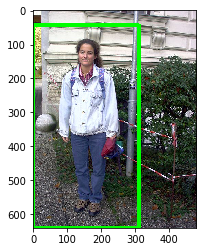

In [35]:
image = cv.imread('./resources/PedestrianImages/person_029.png')

ws = (4, 4)
p = (6, 6)
s = 1.05

start_time = time.time()
pedestrians = detect_pedestrian(image, stride=ws, padding=p, scale=s)

print('Pedestrian detection is performed in %s seconds ---' % (time.time() - start_time))

if (pedestrians is not None):
    print('Found ', len(pedestrians), ' pedestrians')

    for (x, y, w, h) in pedestrians:
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 10)
    plt.imshow(image[:,:,::-1]) # RGB-> BGR
else:
    print('There is no pedestrian found!')

Comment out `boxes = nms(boxes)` to rest difference

In [36]:
def detect_pedestrian_non_max(image, stride, padding, scale):
    #initialise the HOG descriptor and SVM classifier
    hog = cv.HOGDescriptor()
    hog.setSVMDetector(cv.HOGDescriptor_getDefaultPeopleDetector())

    ws = stride
    p = padding
    s = scale
    
    image_resized = imutils.resize(image,
    width = min(400, image.shape[1])) #resize the input image so that
    #the width is max by 400
    scale = image.shape[1] / image_resized.shape[1]

    #detect pedestrians
    (boxes, _) = hog.detectMultiScale(image_resized, winStride = ws,
                                      padding = p, scale = s)

    #non-maximum suppression
    #boxes = nms(boxes)

    #resize the bounding boxes
    for box in boxes:
        box[0] = np.int(box[0] * scale)
        box[1] = np.int(box[1] * scale)
        box[2] = np.int(box[2] * scale)
        box[3] = np.int(box[3] * scale)

    return boxes

### Experiment 1 – Remove non-maximum suppression

Pedestrian detection is performed in 0.12098240852355957 seconds ---
Found  4  pedestrians


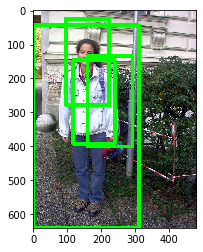

In [37]:
image = cv.imread('./resources/PedestrianImages/person_029.png')

ws = (4, 4)
p = (6, 6)
s = 1.05

start_time = time.time()
pedestrians = detect_pedestrian_non_max(image, stride=ws, padding=p, scale=s)

print('Pedestrian detection is performed in %s seconds ---' % (time.time() - start_time))

if (pedestrians is not None):
    print('Found ', len(pedestrians), ' pedestrians')

    for (x, y, w, h) in pedestrians:
        cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 10)
        plt.imshow(image[:,:,::-1]) # RGB-> BGR
else:
    print('There is no pedestrian found!')

Detection accuracy giving lots of false positives. Resulted in 4 detections, 3 of which were incorrect.

### Experiment 2 – Vary the Window Strides

For the second experiment, I ran a few images through the detector and varied the window stride parameter between [(2, 2), (4, 4), (6, 6), (8, 8)].

In [44]:
winStrides =  [(2, 2), (4, 4), (6, 6), (8, 8)]
p = (6, 6)
s = 1.05

for image_path in padestrian_image_paths:
    image = cv.imread(image_path)
    print(f"image: {image_path}")
    _, img_name = os.path.split(image_path)
    
    for strides in winStrides:
        start_time = time.time()
        image2 = image.copy()
        pedestrians = detect_pedestrian(image, stride=strides, padding=p, scale=s)
        for (x, y, w, h) in pedestrians: #(x, y) are the coordinate of the topleft corner,
            # w, h are the width and height of the bounding box
            cv.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)
            fname = f'winStrides_{strides[0]}_{strides[1]}_{img_name}'
            cv.imwrite(fname, image2)

        if (pedestrians is not None):
            print(f'\tStride: {strides} - detection performed in {(time.time() - start_time):.3f} seconds - {len(pedestrians)} pedestrians found')
        else:
            print(f'\tStride: {strides} - detection performed in {(time.time() - start_time):.3f} seconds - no pedestrian found!')

image: ./resources/PedestrianImages\crop001715.png
	Stride: (2, 2) - detection performed in 0.223 seconds - 1 pedestrians found
	Stride: (4, 4) - detection performed in 0.096 seconds - 1 pedestrians found
	Stride: (6, 6) - detection performed in 0.138 seconds - 1 pedestrians found
	Stride: (8, 8) - detection performed in 0.066 seconds - 1 pedestrians found
image: ./resources/PedestrianImages\crop001718.png
	Stride: (2, 2) - detection performed in 0.375 seconds - 4 pedestrians found
	Stride: (4, 4) - detection performed in 0.226 seconds - 4 pedestrians found
	Stride: (6, 6) - detection performed in 0.218 seconds - 3 pedestrians found
	Stride: (8, 8) - detection performed in 0.107 seconds - 2 pedestrians found
image: ./resources/PedestrianImages\person_029.png
	Stride: (2, 2) - detection performed in 0.439 seconds - 1 pedestrians found
	Stride: (4, 4) - detection performed in 0.114 seconds - 1 pedestrians found
	Stride: (6, 6) - detection performed in 0.200 seconds - 1 pedestrians found


In all cases the processing time decreased as the stride was larger. This makes sense as with a smaller stride its got to process more pixels. Increasing the stride also resulted in lower detection accuracy. The full results can be seen below.

WinStride=(2,2) | WinStride=(6,6) | WinStride=(8,8)
- | - | -
![alt](./resources/notebook_imgs/winStrides_2_2_crop001718.png) | ![alt](./resources/notebook_imgs/winStrides_6_6_crop001718.png)| ![alt](./resources/notebook_imgs/winStrides_8_8_crop001718.png)

### Experiment 3 – Vary the Padding
For the third experiment, I ran a few images through the detector and varied the padding parameter between [(4, 4), (6, 6), (8, 8), (10, 10)]. 

In [45]:
winStrides = (4, 4)
paddings = [(4, 4), (6, 6), (8, 8), (10, 10)] 
scale = 1.05

for image_path in padestrian_image_paths:
    image = cv.imread(image_path)
    print(f"image: {image_path}")
    _, img_name = os.path.split(image_path)
    
    for p in paddings:
        start_time = time.time()
        image2 = image.copy()
        pedestrians = detect_pedestrian(image, stride=winStrides, padding=p, scale=scale)
        
        for (x, y, w, h) in pedestrians: #(x, y) are the coordinate of the topleft corner,
            # w, h are the width and height of the bounding box
            cv.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)
            fname = f'paddings_{p[0]}_{p[1]}_{img_name}'
            cv.imwrite(fname, image2)
        
        if (pedestrians is not None):
            print(f'\tPadding: {p} - detection performed in {(time.time() - start_time):.3f} seconds - {len(pedestrians)} pedestrians found')
        else:
            print(f'\tPadding: {p} - detection performed in {(time.time() - start_time):.3f} seconds - no pedestrian found!')

image: ./resources/PedestrianImages\crop001715.png
	Padding: (4, 4) - detection performed in 0.099 seconds - 1 pedestrians found
	Padding: (6, 6) - detection performed in 0.092 seconds - 1 pedestrians found
	Padding: (8, 8) - detection performed in 0.106 seconds - 1 pedestrians found
	Padding: (10, 10) - detection performed in 0.099 seconds - 1 pedestrians found
image: ./resources/PedestrianImages\crop001718.png
	Padding: (4, 4) - detection performed in 0.228 seconds - 4 pedestrians found
	Padding: (6, 6) - detection performed in 0.243 seconds - 4 pedestrians found
	Padding: (8, 8) - detection performed in 0.252 seconds - 4 pedestrians found
	Padding: (10, 10) - detection performed in 0.241 seconds - 4 pedestrians found
image: ./resources/PedestrianImages\person_029.png
	Padding: (4, 4) - detection performed in 0.146 seconds - 2 pedestrians found
	Padding: (6, 6) - detection performed in 0.146 seconds - 1 pedestrians found
	Padding: (8, 8) - detection performed in 0.121 seconds - 1 ped

The processing time was largely unchanges by the value of this parameter. The accuracy was also largely unchanged although the smallest padding size (4,4) did result in double counting for images person_029.png and person_032.png. Full output can be seen below.

padding=(4,4) | padding=(4,4) |
- | - |
![alt](./resources/notebook_imgs/paddings_4_4_person_029.png) | ![alt](./resources/notebook_imgs/paddings_4_4_person_032.png)|

### Experiment 4 – Vary the Scale
For the forth experiment, I ran a few images through the detector and varied the scale parameter between [1.05, 1.1, 1.15, 1.2]. 

In [46]:
winStride = (4, 4)
padding = (6, 6) 
scales =  [1.05, 1.1, 1.15, 1.2]

for image_path in padestrian_image_paths:
    image = cv.imread(image_path)
    print(f"image: {image_path}")
    _, img_name = os.path.split(image_path)
    
    for s in scales:
        start_time = time.time()
        image2 = image.copy()
        pedestrians = detect_pedestrian(image, stride=winStride, padding=padding, scale=s)
        for (x, y, w, h) in pedestrians: #(x, y) are the coordinate of the topleft corner,
            # w, h are the width and height of the bounding box
            cv.rectangle(image2, (x, y), (x + w, y + h), (0, 255, 0), 2)
            fname = f'scale_{s}_{img_name}'
            cv.imwrite(fname, image2)
        
        if (pedestrians is not None):
            print(f'\tScale: {s} - detection is performed in {(time.time() - start_time):.3f} seconds - {len(pedestrians)} pedestrians found')
        else:
            print(f'\tScale: {s} - detection is performed in {(time.time() - start_time):.3f} seconds - no pedestrian found!')

image: ./resources/PedestrianImages\crop001715.png
	Scale: 1.05 - detection is performed in 0.096 seconds - 1 pedestrians found
	Scale: 1.1 - detection is performed in 0.100 seconds - 1 pedestrians found
	Scale: 1.15 - detection is performed in 0.087 seconds - 1 pedestrians found
	Scale: 1.2 - detection is performed in 0.084 seconds - 1 pedestrians found
image: ./resources/PedestrianImages\crop001718.png
	Scale: 1.05 - detection is performed in 0.224 seconds - 4 pedestrians found
	Scale: 1.1 - detection is performed in 0.170 seconds - 3 pedestrians found
	Scale: 1.15 - detection is performed in 0.159 seconds - 3 pedestrians found
	Scale: 1.2 - detection is performed in 0.112 seconds - 2 pedestrians found
image: ./resources/PedestrianImages\person_029.png
	Scale: 1.05 - detection is performed in 0.112 seconds - 1 pedestrians found
	Scale: 1.1 - detection is performed in 0.071 seconds - 1 pedestrians found
	Scale: 1.15 - detection is performed in 0.081 seconds - 1 pedestrians found
	Scal

The processing time increased with as the scale value was smaller. The accuracy also decreased as the scale factor increased.

Scale=1.05 | Scale=1.1 | Scale=1.2
- | - | -
![alt](./resources/notebook_imgs/scale_1.05_crop001718.png) | ![alt](./resources/notebook_imgs/scale_1.1_crop001718.png)|![alt](./resources/notebook_imgs/scale_1.2_crop001718.png)